In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.combine import SMOTEENN, SMOTETomek
import xgboost as xgb

df = pd.read_csv("dataset/preprocessed.csv")
df.shape

(762106, 44)

In [15]:
df = df.drop(df[df.target == -1].index)
df.shape

(762094, 44)

In [16]:
# Separate input features and target
y = df.target

In [17]:
X = df.drop('target', axis = 1)

In [18]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)

### Train the model without re-sampling

In [19]:
xgb = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [20]:
preds = xgb.predict(X_test)

Accuracy: 	 0.6053305620289308
F1 Score: 	 0.5664591709868774
Precision:	 0.5669791225043612
Recall:   	 0.5679825019809606


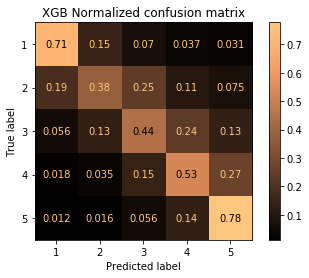

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt

print("Accuracy: \t", accuracy_score(y_test, preds))
print("F1 Score: \t", f1_score(y_test, preds, average = 'macro'))
print("Precision:\t", precision_score(y_test, preds, average = 'macro'))
print("Recall:   \t", recall_score(y_test, preds, average = 'macro'))

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "XGB Normalized confusion matrix"
disp = plot_confusion_matrix(xgb, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

### Train the model with re-sampling

In [22]:
sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [24]:
import xgboost as xgb
xgb_sampled = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)
xgb_sampled.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [25]:
xgb_sampled_pred = xgb_sampled.predict(X_test)

Accuracy: 	 0.5773550838739476
F1 Score: 	 0.5525298808446247
Precision:	 0.5432478530415479
Recall:   	 0.5721347102477687


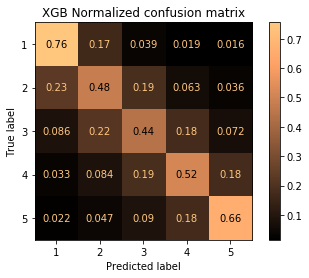

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt

print("Accuracy: \t", accuracy_score(y_test, xgb_sampled_pred))
print("F1 Score: \t", f1_score(y_test, xgb_sampled_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test, xgb_sampled_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test, xgb_sampled_pred, average = 'macro'))

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "XGB Normalized confusion matrix"
disp = plot_confusion_matrix(xgb_sampled, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()
